## This is the code for read necessary data from original mat file

In [9]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [ ]:
datafolder = '/home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/Dataset_5/A1104-180328/Data'

### get the time and head direction

t shape: (186662,)
data shape: (186662,)


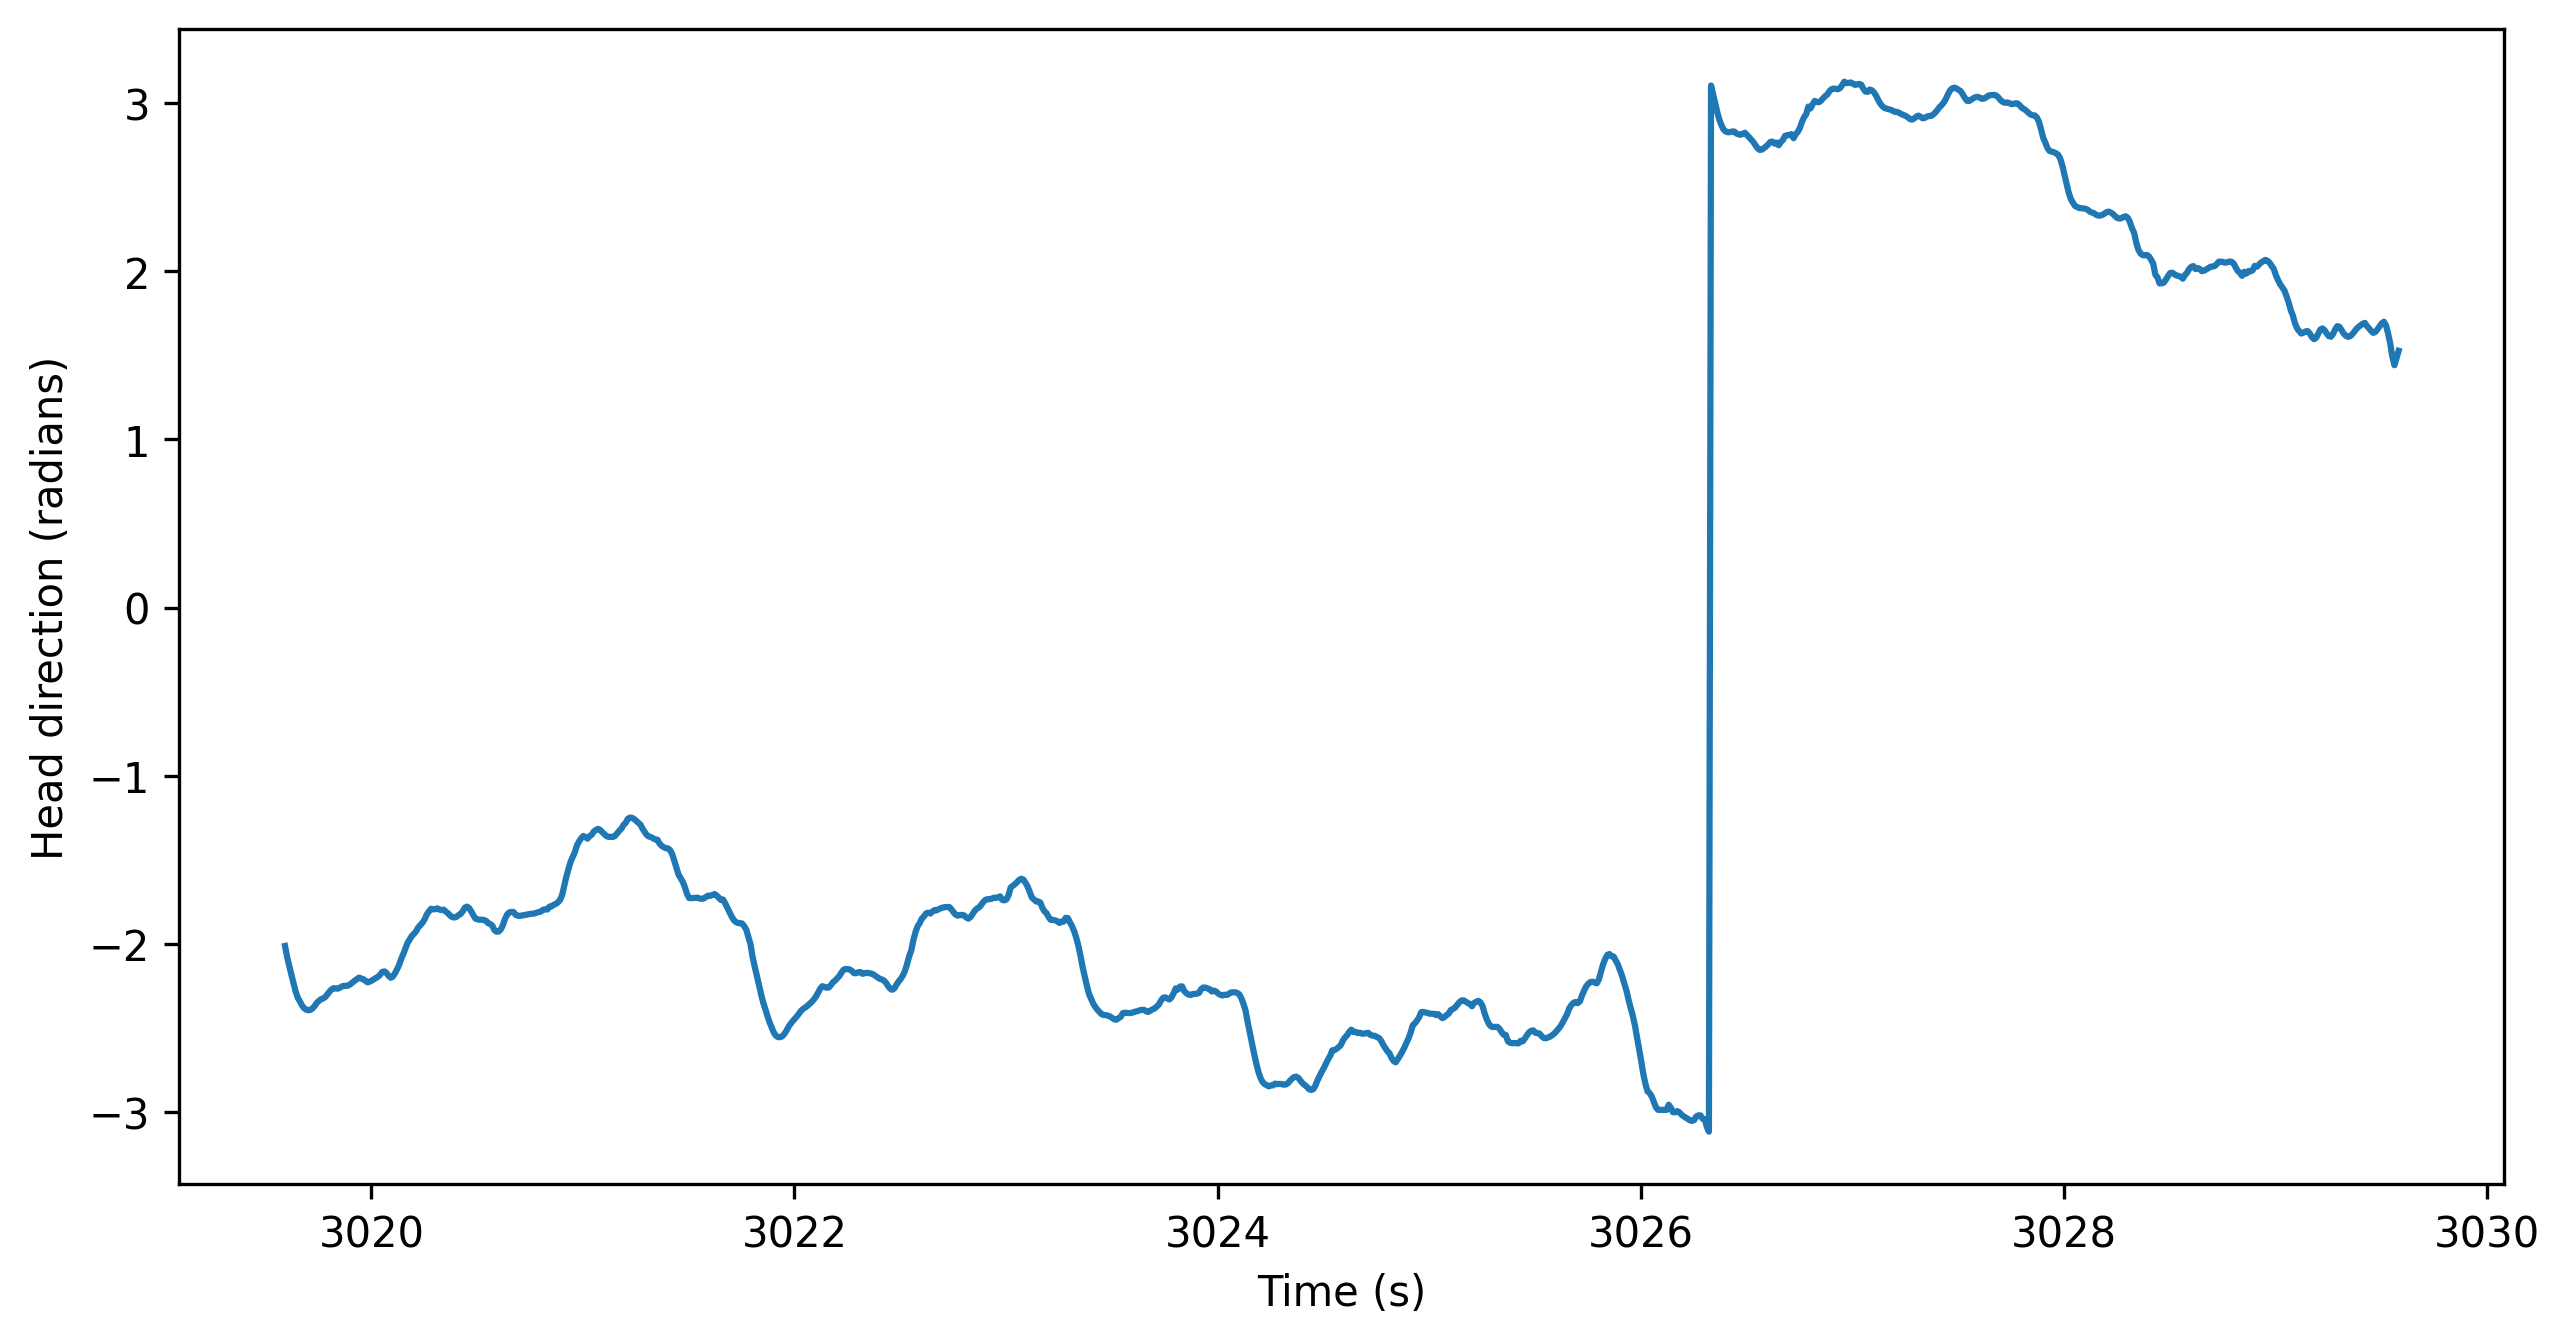

In [12]:
file = 'Angle.mat'

#read the data into numpy array. Setting struct_as_record=False, squeeze_me=True: 
# this simplifies MATLAB structs into Python objects instead of nested dictionaries.
data = sio.loadmat(datafolder + '/' + file, struct_as_record=False, squeeze_me=True)

# Extract the 'ang' structure
ang = data.get('ang')  # 'ang' is a struct in the MAT file

# Extract 't' and 'data' from the 'ang' struct
t = ang.t
angle_data = ang.data

# Print shapes to verify
print("t shape:", t.shape)
print("data shape:", angle_data.shape)

#plot head direction as a function of time
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
T = 1000
ax.plot(t[:T], angle_data[:T])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Head direction (radians)')

plt.show()


### get the Brain area, i.e., if cells recorded in ADN or PoS

In [13]:
file = 'BrainArea.mat'

data = sio.loadmat(datafolder + '/' + file, struct_as_record=False, squeeze_me=True)

adn = data.get('adn')  # if cells belongs to ADN, the value is 1 otherwise 0

pos = data.get('pos')  # if cells belongs to PoS, the value is 1 otherwise 0

### get the cell identity, i.e., if the cell is head direction cell, we only care about if it is a head direction cell

In [16]:
file = 'CellTypes.mat'

data = sio.loadmat(datafolder + '/' + file, struct_as_record=False, squeeze_me=True)

hd = data.get('hd')  # if cells belongs to HD, the value is 1 otherwise 0

### get the spike time for each cell

In [22]:
file = 'SpikeData.mat'

data = sio.loadmat(datafolder + '/' + file, struct_as_record=False, squeeze_me=True)

S = data.get('S')  # spike data

# Extract the 'C' cell array from 'S'
C = S.C  # C is a list of structs, each containing 'tsd'

# Extract spike times from each cell
spike_times = [cell.tsd.t for cell in C]  # Extract 't' from 'tsd' for each cell


### now put everything together

In [39]:
def load_data(mousetrial):
    
    '''
    Load the data for a given mouse trial
    Inputs:
    mousetrial: string, the name of the mouse trial
    brainarea: string, the brain area to filter the cells
    celltype: string, the cell type to filter the cells
    '''
    
    #load time and head direction
    file = 'Angle.mat'
    
    data = sio.loadmat(mousetrial + '/' + file, struct_as_record=False, squeeze_me=True)
    ang = data.get('ang')
    t = ang.t
    angle_data = ang.data
    
    #load brain area
    file = 'BrainArea.mat'
    
    data = sio.loadmat(mousetrial + '/' + file, struct_as_record=False, squeeze_me=True)
    adn = data.get('adn')
    pos = data.get('pos')
    
    #load cell types
    file = 'CellTypes.mat'
    
    data = sio.loadmat(mousetrial + '/' + file, struct_as_record=False, squeeze_me=True)
    hd = data.get('hd')
    
    #load spike data
    file = 'SpikeData.mat'

    data = sio.loadmat(mousetrial + '/' + file, struct_as_record=False, squeeze_me=True)
    S = data.get('S')
    C = S.C
    spike_times = [cell.tsd.t for cell in C]
    
    #filter out spike times fall out of the range of timestamps
    for i in range(len(spike_times)):
        valid_mask = (spike_times[i] >= t[0]) & (spike_times[i] <= t[-1])
        spike_times[i] = spike_times[i][valid_mask]
        
    #filter cells according to brainarea and celltype
    
    # #first get cells only with cells in adn and is a hd cell
    # if brainarea == 'adn' and celltype == 'hd':
    #     idx = np.where((adn == 1) & (hd == 1))[0]
    # #second get cells only with cells in pos and is a hd cell
    # elif brainarea == 'pos' and celltype == 'hd':
    #     idx = np.where((pos == 1) & (hd == 1))[0]
    # #else report error
    # else:
    #     print('Invalid brain area or cell type')
    #     return

    # #filter the spike times and return only the spike times of the cells that satisfy the condition
    # spike_times = [spike_times[i] for i in idx]
    
    
    return {'t': t, 'angle_data': angle_data, 'adn': adn, 'pos': pos, 'hd': hd, 'spike_times': spike_times}



In [40]:
mousetrial = '/home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/Dataset_5/A1104-180328/Data'

data = load_data(mousetrial)

In [41]:
data

{'t': array([3019.592, 3019.602, 3019.612, ..., 4886.182, 4886.192, 4886.202]),
 'angle_data': array([-2.01251647, -2.07850737, -2.13169279, ...,  0.34969173,
         0.36947486,  0.40799689]),
 'adn': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8),
 'pos': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 'hd': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=uint8),
 'spike_times': [array([2.79535000e+00, 3.26090000e+00, 6.41415000e+00, ...,
         4.88892500e+03, 4.88917095e+03, 4.88948890e+03]),
  array([1.50050000e-01, 1.32705000e+00, 2.28970000e+00, ...,
         4.88954715e+03, 4.88958220e+03, 4.88973580e+03]),
  array([1.46650000e-01, 1.59750000e-01, 4.03600000e-01, ...,
         4.88958060e+03, 4.88965015e+03, 4.88966520e+03]),
  array([1.1415000e-01, 1.1650000e-01, 1.1875000e-01, ..., 4.8893659e+03,
         4.8896353e+03, 4.8897040e+03]),
  array([4.92200000e-01, 1.15220000e+00, 1.75945000e+00, ...,
         4.88938915e+03, 4